In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = 'USDJPY=X'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-16 00:00:00+00:00,128.320999,131.559006,127.607002,129.550003,0,0.0,0.0
2023-01-23 00:00:00+00:00,129.384995,131.069000,129.035004,129.869995,0,0.0,0.0
2023-01-30 00:00:00+00:00,129.854004,131.190002,128.093002,131.179993,0,0.0,0.0
2023-02-06 00:00:00+00:00,132.009003,132.891998,129.834000,131.410004,0,0.0,0.0
2023-02-13 00:00:00+00:00,131.550995,135.080002,131.466003,134.110001,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-16 00:00:00+00:00,153.453003,157.873001,153.326004,156.440002,0,0.0,0.0
2024-12-23 00:00:00+00:00,156.533005,158.074997,146.201996,157.860001,0,0.0,0.0
2024-12-30 00:00:00+00:00,157.873001,158.059006,156.042999,157.199997,0,0.0,0.0


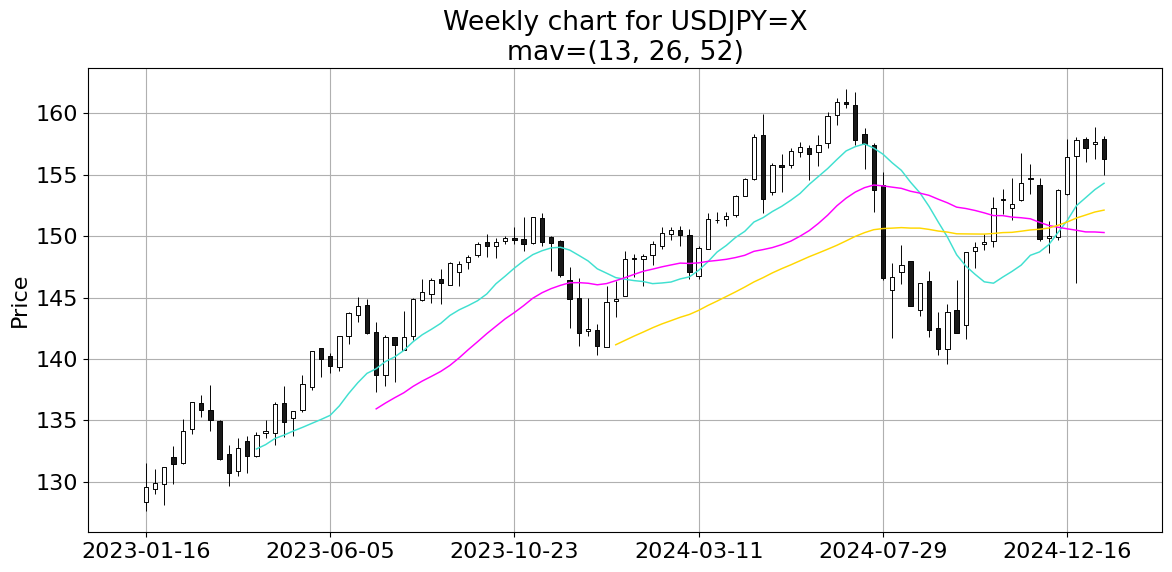

In [2]:
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='default',
    mav=(13, 26, 52),
    volume=False,
    datetime_format='%Y-%m-%d',
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s\nmav=(13, 26, 52)' % symbol)
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_exchange.png')
plt.show()

In [3]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-13 00:00:00+00:00,157.886993,158.121994,154.973007,156.266006,0,0.0,0.0


In [4]:
df.tail(2)['Close']

Date
2025-01-06 00:00:00+00:00    157.690002
2025-01-13 00:00:00+00:00    156.266006
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2025-01-06 00:00:00+00:00         NaN
2025-01-13 00:00:00+00:00   -1.423996
Name: Close, dtype: float64

In [6]:
df['Close'].rolling(26).mean()

Date
2023-01-16 00:00:00+00:00           NaN
2023-01-23 00:00:00+00:00           NaN
2023-01-30 00:00:00+00:00           NaN
2023-02-06 00:00:00+00:00           NaN
2023-02-13 00:00:00+00:00           NaN
                                ...    
2024-12-16 00:00:00+00:00    150.594616
2024-12-23 00:00:00+00:00    150.478462
2024-12-30 00:00:00+00:00    150.343077
2025-01-06 00:00:00+00:00    150.337692
2025-01-13 00:00:00+00:00    150.291000
Name: Close, Length: 105, dtype: float64

In [7]:
df['Close'].rolling(52).mean()

Date
2023-01-16 00:00:00+00:00           NaN
2023-01-23 00:00:00+00:00           NaN
2023-01-30 00:00:00+00:00           NaN
2023-02-06 00:00:00+00:00           NaN
2023-02-13 00:00:00+00:00           NaN
                                ...    
2024-12-16 00:00:00+00:00    151.149403
2024-12-23 00:00:00+00:00    151.473250
2024-12-30 00:00:00+00:00    151.714980
2025-01-06 00:00:00+00:00    151.961711
2025-01-13 00:00:00+00:00    152.118077
Name: Close, Length: 105, dtype: float64